In [22]:
# import required libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# loading the data
apple_data = np.load('../SampleData/apple.npy')
bread_data = np.load('../SampleData/bread.npy')
broccoli_data = np.load('../SampleData/broccoli.npy')
sandwich_data = np.load('../SampleData/sandwich.npy')

# each variable is an array of 28x28 matrices with 
# entries being BW colour values, with a few thousand items total

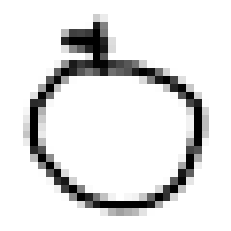

In [20]:
# understanding the data
def print_data(data):
    for line in data:
        print(line)
        print('----------------')

# print(apple_data[:10])

# cleaner printing
def print_drawing(drawing):
    plt.imshow(drawing.reshape((28,28)), cmap='Greys')
    plt.axis('off')
    plt.show()

print_drawing(apple_data[6])

In [25]:
# randomizing the data
np.random.shuffle(apple_data)
np.random.shuffle(bread_data)
np.random.shuffle(broccoli_data)
np.random.shuffle(sandwich_data)

# splitting into test and train
train_percent = 0.8

# take first apple_percent of entries
# [1,0,0,0] = apple, [0,1,0,0] = bread, [0,0,1,0] = broccoli, [0,0,0,1] = sandwich
# all the training data should return apples
apple_cutoff = math.floor(len(apple_data) * train_percent)
apple_trainX = apple_data[:apple_cutoff]
apple_trainY = np.tile([1,0,0,0], (len(apple_trainX), 1))
apple_testX = apple_data[apple_cutoff:]
apple_testY = np.tile([1,0,0,0], (len(apple_testX), 1))

# all the training data should return bread etc.
bread_cutoff = math.floor(len(bread_data) * train_percent)
bread_trainX = bread_data[:bread_cutoff]
bread_trainY = np.tile([0,1,0,0], (len(bread_trainX),1))
bread_testX = bread_data[bread_cutoff:]
bread_testY = np.tile([0,1,0,0], (len(bread_testX),1))

broccoli_cutoff = math.floor(len(broccoli_data) * train_percent)
broccoli_trainX = broccoli_data[:broccoli_cutoff]
broccoli_trainY = np.tile([0,0,1,0], (len(broccoli_trainX),1))
broccoli_testX = broccoli_data[broccoli_cutoff:]
broccoli_testY = np.tile([0,0,1,0], (len(broccoli_testX),1))

sandwich_cutoff = math.floor(len(sandwich_data) * train_percent)
sandwich_trainX = sandwich_data[:sandwich_cutoff]
sandwich_trainY = np.tile([0,0,0,1], (len(sandwich_trainX),1))
sandwich_testX = sandwich_data[sandwich_cutoff:]
sandwich_testY = np.tile([0,0,0,1], (len(sandwich_testX),1))

# building the training and testing arrays
# just combine the above - syntax is to put all arrays in a tuple
X_train = np.concatenate((apple_trainX, bread_trainX, broccoli_trainX, sandwich_trainX))
Y_train = np.concatenate((apple_trainY, bread_trainY, broccoli_trainY, sandwich_trainY))

X_test = np.concatenate((apple_testX, bread_testX, broccoli_testX, sandwich_testX))
Y_test = np.concatenate((apple_testY, bread_testY, broccoli_testY, sandwich_testY))

In [26]:
# normalize the X data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [30]:
# building out the model
# sequential: linear layers of nodes
# disclaimer: choice of # nodes/layers was kinda arbitrary; dropout is to prevent overfitting
# adjusting the size of nodes in each layer affects behaviour; in small models, first two having same number is 
# usually good
model = keras.models.Sequential()

# adding the first hidden layer
# a Dense layer is one that's fully connected to the previous layer, let it have 512 nodes
# input is a 28x28 photo, so 784 items
model.add(layers.Dense(512, input_shape = (784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# adding the second hidden layer
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# adding the output layer
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

In [32]:
# compiling the model
# copied from tutorial
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [33]:
# training the model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
3312/3312 - 14s - loss: 0.8428 - accuracy: 0.8773 - val_loss: 0.2555 - val_accuracy: 0.9197
Epoch 2/20
3312/3312 - 14s - loss: 0.2683 - accuracy: 0.9155 - val_loss: 0.2348 - val_accuracy: 0.9236
Epoch 3/20
3312/3312 - 14s - loss: 0.2494 - accuracy: 0.9216 - val_loss: 0.2154 - val_accuracy: 0.9314
Epoch 4/20
3312/3312 - 16s - loss: 0.2373 - accuracy: 0.9258 - val_loss: 0.2142 - val_accuracy: 0.9322
Epoch 5/20
3312/3312 - 16s - loss: 0.2276 - accuracy: 0.9293 - val_loss: 0.2220 - val_accuracy: 0.9284
Epoch 6/20
3312/3312 - 15s - loss: 0.2200 - accuracy: 0.9315 - val_loss: 0.1991 - val_accuracy: 0.9352
Epoch 7/20
3312/3312 - 15s - loss: 0.2113 - accuracy: 0.9338 - val_loss: 0.2032 - val_accuracy: 0.9369
Epoch 8/20
3312/3312 - 15s - loss: 0.2075 - accuracy: 0.9354 - val_loss: 0.1905 - val_accuracy: 0.9372
Epoch 9/20
3312/3312 - 12s - loss: 0.2045 - accuracy: 0.9361 - val_loss: 0.1943 - val_accuracy: 0.9375
Epoch 10/20
3312/3312 - 14s - loss: 0.1983 - accuracy: 0.9381 - val_loss: